In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# interactive matplotlib
# plt.ion()


In [2]:

def discretiser_maison(Nx=1000, Ny=500):
    """Crée une grille discrète du domaine représentant la maison.
    
    Paramètre :
    - N : nombre de points de discrétisation sur chaque axe
    
    Retourne :
    - grid : matrice 2D représentant le domaine (1 = mur, 0 = espace libre)
    """
    grid = np.zeros((Nx, Ny), dtype=int)  # 0 = espace libre

    # Échelle en fonction de N
    def scale_x(val):  
        return int(val * Nx / 100)
    
    def scale_y(val):  
        return int(val * Ny / 100)
    
    # Epaisseur des murs
    d = 5
    # Aller
    ay = scale_y(10)
    ax = scale_x(10)

    # Murs extérieurs
    grid[0:d, :] = 1
    grid[-d:, :] = 1
    grid[:, 0:d] = 1
    grid[:, -d:] = 1

    # Murs intérieurs
    # grid[0:scale_x(35), scale_y(30):scale_y(30)+d] = 1  
    grid[scale_x(50):-1, scale_y(30):scale_y(30)+d] = 1
    
    grid[scale_x(50):-1, scale_y(40):scale_y(40)+d] = 1
    grid[scale_x(50):scale_x(50)+d, scale_y(40):scale_y(50)] = 1
    
    grid[scale_x(50):-1, scale_y(70):scale_y(70)+d] = 1
    
    grid[scale_x(50):scale_x(50)+d, scale_y(60):scale_y(70)+d] = 1
    grid[scale_x(50):scale_x(50)+d, scale_y(70)+ay:-1] = 1
     
    grid[scale_x(35)-d:scale_x(35), scale_y(30):scale_y(60)+d] = 1
    # grid[0:scale_x(30), scale_y(70)+ay:-1] = 1
    
    
    # Salle de bain
    grid[scale_x(35)-d:scale_x(35), scale_y(80):-1] = 1
    grid[0:scale_x(35), scale_y(70):scale_y(70)+d] = 1
    
    # Cuisine
    grid[0:scale_x(20), scale_y(50):scale_y(50)+d] = 1

    return grid

C:\Users\judes\AppData\Local\Temp\ipykernel_11200\3147648833.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  cercle = Circle(router_position, radius=2, color='red', facecolor='none', linewidth=2)


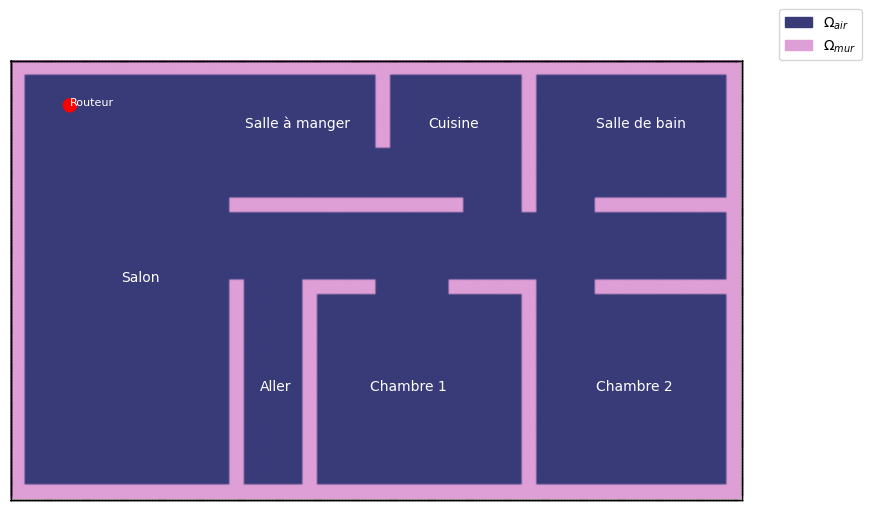

In [42]:
Nx, Ny = 150, 250

Lx, Ly = 5, 8

eps_s =1e-1

x_s, y_s =  eps_s , eps_s

router_position = .8 * y_s*Ny, x_s*Nx

grid = discretiser_maison(Nx, Ny)

# Affichage du domaine
plt.figure(figsize=(15,6))

plt.imshow(grid, cmap='tab20b')

# Since tab20b has a specific color mapping, we need to use appropriate colors for walls and air
# Create legend patches with properly formatted LaTeX labels
wall_patch = mpatches.Patch(color=plt.cm.tab20b(19), label=r"$\Omega_{mur}$")  # Dark color for walls
air_patch = mpatches.Patch(color=plt.cm.tab20b(0), label=r"$\Omega_{air}$")  # Light color for air
plt.legend(handles=[air_patch, wall_patch], loc=(1, 1))

pieces = {
    "Salon" : (0.15 * Ny, 0.5 * Nx),
    "Salle à manger" : (.32 * Ny, .15 * Nx),
    "Cuisine" : (.57 * Ny, .15*Nx),
    "Salle de bain" : (.8 * Ny, .15*Nx),
    "Chambre 1" : (.49 * Ny, .75*Nx),
    "Chambre 2" : (.8 * Ny, .75*Nx),
    "Aller" : (.34*Ny, .75*Nx)
}

# plt.title(f"Domaine discrétisé (N = {N})")
plt.text(*router_position, "Routeur", color="white", fontsize=8)

# # Nouvelle position du routeur
# router_new_position = .59*Ny, .28*Nx

# plt.text(*router_new_position, "Nouvelle Position", color="white", fontsize=8)
# rcercle = Circle(router_new_position, radius=2, color='blue', facecolor='none', linewidth=2)
# plt.gca().add_patch(rcercle)

# Ici, (x, y) = (5, 5) est le centre du cercle et 2 est le rayon
cercle = Circle(router_position, radius=2, color='red', facecolor='none', linewidth=2)

# Ajout du cercle sur la figure
plt.gca().add_patch(cercle)

# # Toilettes
# plt.text(*(.9*Ny - 3, .89*Nx - 3), "Mon lit", color="white", fontsize=8)
# chambre2 = mpatches.Rectangle((.9*Ny - 3, .9*Nx - 3), 20, 8, edgecolor='green', facecolor='green', linewidth=2)
# plt.gca().add_patch(chambre2)

# Ajout des pieces
for piece, position in pieces.items():
    plt.text(*position, piece, color="white", fontsize=10)
    

# plt.show()
plt.axis('off')
plt.plot(np.arange(0, Ny), np.zeros(Ny), 'k_')
plt.plot(np.arange(0, Ny), np.zeros(Ny)+Nx, 'k_')

plt.plot(np.zeros(Nx),np.arange(0, Nx), 'k|')
plt.plot(np.zeros(Nx)+Ny,np.arange(0, Nx), 'k|')


plt.savefig("maison.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
# zoom and dezoom matplotlib
# for creating a responsive plot 
# %matplotlib widget 

In [12]:
# load solution
U = np.load("solution.npy")

In [18]:
# Valueur de U a la position du routeur
U_router = U[int(router_position[0]-3):int(router_position[0]+3), int(router_position[1]-3):int(router_position[1]+3)]

np.abs(U_router).max()

0.04179545267637255

In [30]:
# Position du lit
.9*Lx, .9*Ly

(4.5, 7.2)

In [27]:
# Valeurs de U dans les toilettes
# (.9*Ny - 3, .9*Nx - 3)
U_chambre2 = U[int(.9*Ny)-8:int(.9*Ny)+8, int(.9*Nx)-4:int(.9*Nx)+4]
np.abs(U_chambre2).mean()

0.004819512466283496

In [28]:
np.abs(U_chambre2).mean() > .25 * np.abs(U_router).max()

False

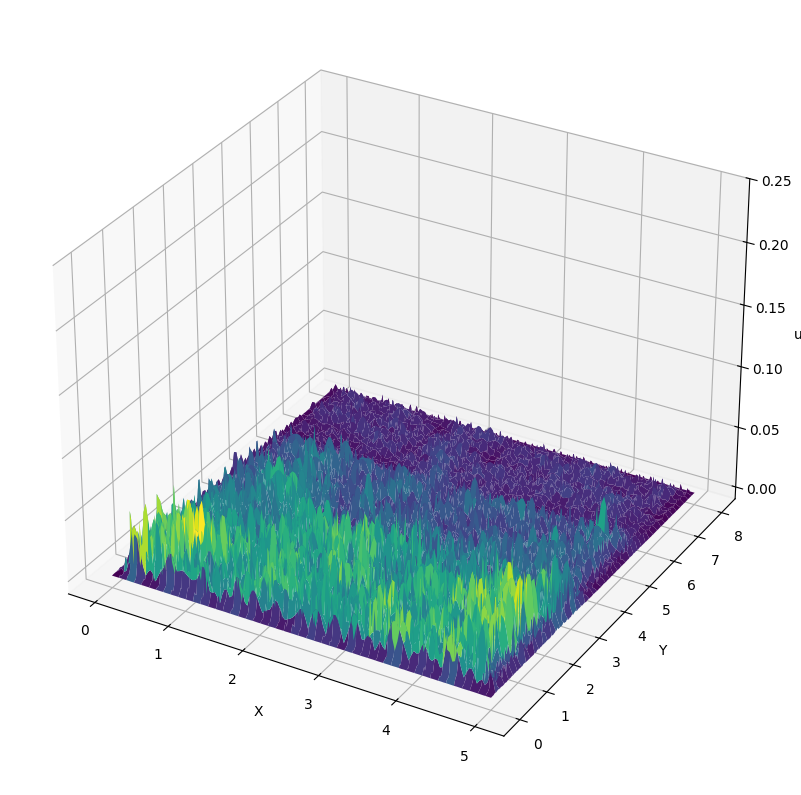

In [ ]:
# fig = plt.figure(figsize=(10, 15))
# ax = fig.add_subplot(111, projection='3d')

# # Create a meshgrid for plotting
# X, Y = np.meshgrid(np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny))


# # Plot the surface
# ax.plot_surface(X, Y, np.abs(U), cmap='viridis')


# # Set labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('u')

# # set z max
# ax.set_zlim(-.01, .25)

# plt.show()


In [ ]:

# Supposons que U soit vos données 3D (ici un exemple)
Lx, Ly = 5, 8
Nx, Ny = 50, 50  # résolutions pour le plot 3D
X, Y = np.meshgrid(np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny))
# U = np.abs(np.sin(X) * np.cos(Y))  # exemple de données

# Chargement de l'image (préalablement sauvegardée "maison.png")
img = plt.imread("maison.png")

# Création de la figure avec un axe 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# --- 1. Affichage de l'image dans le plan z=0 ---
# Pour que l'image s'étende sur [0, Lx] en x et [0, Ly] en y,
# on crée un maillage correspondant aux dimensions de l'image.
# img.shape[1] correspond à la largeur (nombre de colonnes) et
# img.shape[0] à la hauteur (nombre de lignes).

x_img = np.linspace(0, Lx, img.shape[1])
y_img = np.linspace(0, Ly, img.shape[0])
X_img, Y_img = np.meshgrid(x_img, y_img)
Z_img = np.zeros_like(X_img)  # plan z=0

# La fonction plot_surface permet d'afficher une image en utilisant son tableau de couleurs.
ax.plot_surface(X_img, Y_img, Z_img,
                rstride=1, cstride=1,
                facecolors=img,
                shade=False)

# --- 2. Affichage de la surface 3D avec un décalage en z ---
# Ici, on décale la surface de 1 en z en ajoutant +1 à np.abs(U).
ax.plot_surface(X, Y, U + 1, cmap='viridis')

# --- 3. Réglages de l'affichage ---
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Ajustement des limites en z pour bien voir l'image en dessous et la surface au-dessus.
ax.set_zlim(0, np.max(U) + 1.1)

plt.show()


c:\Users\judes\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50, 50) and arg 2 with shape (250, 150).

Error in callback <function _draw_all_if_interactive at 0x0000013E65723F60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 